In [1]:
import pandas as pd

df = pd.read_csv("/home/fbotero/Downloads/imoveis/resultados_globais.csv")

df.head()

,Modelo,Acurácia Teste,Tempo Treinamento (s),Melhores Parâmetros
0,LogisticRegression | Balanceamento: Nenhum | P...,0.653123,7.652923,NaN
1,RandomForest | Balanceamento: Nenhum | PCA: Nã...,0.614312,4.035075,NaN
2,SVM | Balanceamento: Nenhum | PCA: Não | Param...,0.642207,17.101359,NaN
3,KNN | Balanceamento: Nenhum | PCA: Não | Param...,0.591874,0.006812,NaN
4,DecisionTree | Balanceamento: Nenhum | PCA: Nã...,0.589448,0.583081,NaN


## Extrair partes do nome do modelo

In [2]:

df["ModeloBase"] = df["Modelo"].str.split("|").str[0].str.strip()
df["Balanceamento"] = df["Modelo"].str.extract(r"Balanceamento: (\w+)")[0]
df["PCA"] = df["Modelo"].str.extract(r"PCA: (\w+)")[0]
df["tipo_parametros"] = df["Modelo"].str.extract(r"Parametros: (\w+)")[0]

df.head()

,Modelo,Acurácia Teste,Tempo Treinamento (s),Melhores Parâmetros,ModeloBase,Balanceamento,PCA,tipo_parametros
0,LogisticRegression | Balanceamento: Nenhum | P...,0.653123,7.652923,NaN,LogisticRegression,Nenhum,Não,default
1,RandomForest | Balanceamento: Nenhum | PCA: Nã...,0.614312,4.035075,NaN,RandomForest,Nenhum,Não,default
2,SVM | Balanceamento: Nenhum | PCA: Não | Param...,0.642207,17.101359,NaN,SVM,Nenhum,Não,default
3,KNN | Balanceamento: Nenhum | PCA: Não | Param...,0.591874,0.006812,NaN,KNN,Nenhum,Não,default
4,DecisionTree | Balanceamento: Nenhum | PCA: Nã...,0.589448,0.583081,NaN,DecisionTree,Nenhum,Não,default


In [3]:
# Pega o índice da linha com a maior acurácia
indice_max = df['Acurácia Teste'].idxmax()

# Usa .loc para selecionar a linha inteira por esse índice
df.loc[indice_max]

Modelo                   LogisticRegression | Balanceamento: Nenhum | P...
Acurácia Teste                                                    0.653123
Tempo Treinamento (s)                                             7.652923
Melhores Parâmetros                                                    NaN
ModeloBase                                              LogisticRegression
Balanceamento                                                       Nenhum
PCA                                                                    Não
tipo_parametros                                                    default
Name: 0, dtype: object

In [4]:
# Extrair tipo de parâmetro
df["TipoParametro"] = df["Modelo"].str.extract(r"(default|grid|best)")[0]

# Ajustar balanceamento (caso não tenha, é "none")
df["Balanceamento"] = df["Modelo"].str.extract(r"Balanceamento: (\w+)")[0].fillna("none")

# Ajustar PCA (caso não tenha, é False)
df["PCA"] = df["Modelo"].str.extract(r"PCA: (\w+)")[0].fillna("False")

# Criar a coluna de cenário padronizada
df["Cenário"] = (
    df["TipoParametro"].str.capitalize() +
    " | Balanceamento: " + df["Balanceamento"].str.upper() +
    " | PCA: " + df["PCA"]
)


In [13]:
tabela_melhores = df.pivot_table(
    index="Cenário",
    columns="ModeloBase",
    values="Acurácia Teste",
    aggfunc="max"
).reset_index()

# Tabela de menor tempo de treino (ou use 'mean' se preferir)
tabela_tempos = df.pivot_table(
    index="Cenário",
    columns="ModeloBase",
    values="Tempo Treinamento (s)",
    aggfunc="min"
).reset_index()

# Renomear colunas para diferenciar
tabela_tempos = tabela_tempos.add_suffix(" (Tempo)").rename(columns={"Cenário (Tempo)": "Cenário"})

# Juntar as duas tabelas pelo cenário
tabela_completa = pd.merge(tabela_melhores, tabela_tempos, on="Cenário", how="left")

# Exemplo de formatação para exibição
tabela_formatada = tabela_completa.copy()
for col in tabela_formatada.columns[1:]:
    if "Acurácia" in col:
        tabela_formatada[col] = tabela_formatada[col].apply(lambda x: f"{x*100:.2f}%" if pd.notna(x) else '')
    elif "Tempo" in col:
        tabela_formatada[col] = tabela_formatada[col].apply(lambda x: f"{x:.2f}s" if pd.notna(x) else '')

print(tabela_formatada)


ModeloBase                                     Cenário  DecisionTree  \
0              Best | Balanceamento: NENHUM | PCA: Não      0.599151   
1               Best | Balanceamento: SMOTE | PCA: Não      0.599151   
2               Best | Balanceamento: SMOTE | PCA: Sim      0.590661   
3               Best | Balanceamento: TOMEK | PCA: Não      0.599757   
4               Best | Balanceamento: TOMEK | PCA: Sim      0.571862   
5           Default | Balanceamento: NENHUM | PCA: Não      0.589448   
6            Default | Balanceamento: SMOTE | PCA: Não      0.585203   
7            Default | Balanceamento: SMOTE | PCA: Sim      0.543966   
8            Default | Balanceamento: TOMEK | PCA: Não      0.585203   
9            Default | Balanceamento: TOMEK | PCA: Sim      0.530018   
10             Grid | Balanceamento: NENHUM | PCA: Não      0.600364   
11              Grid | Balanceamento: SMOTE | PCA: Não      0.599151   
12              Grid | Balanceamento: SMOTE | PCA: Sim      0.59

In [14]:
melhores_resultados = pd.DataFrame(tabela_formatada)
melhores_resultados

ModeloBase,Cenário,DecisionTree,KNN,LogisticRegression,NaiveBayes,NeuralNetwork,RandomForest,SVM,DecisionTree (Tempo),KNN (Tempo),LogisticRegression (Tempo),NaiveBayes (Tempo),NeuralNetwork (Tempo),RandomForest (Tempo),SVM (Tempo)
0,Best | Balanceamento: NENHUM | PCA: Não,0.599151,0.597938,0.653123,0.338993,0.650091,0.613705,0.642814,0.19s,0.01s,7.94s,0.06s,17.68s,2.67s,14.50s
1,Best | Balanceamento: SMOTE | PCA: Não,0.599151,0.597938,0.653123,0.338993,0.647059,0.608854,0.642814,0.20s,0.01s,7.69s,0.06s,18.05s,2.61s,14.36s
2,Best | Balanceamento: SMOTE | PCA: Sim,0.590661,0.617344,0.625227,0.554275,0.640995,0.639782,0.631292,0.65s,0.01s,4.64s,0.01s,4.10s,6.03s,2.74s
3,Best | Balanceamento: TOMEK | PCA: Não,0.599757,0.597938,0.653123,0.338993,0.646452,0.608854,0.642814,0.20s,0.01s,7.95s,0.07s,17.69s,2.62s,14.41s
4,Best | Balanceamento: TOMEK | PCA: Sim,0.571862,0.613705,0.626440,0.557307,0.640995,0.640388,0.631292,0.65s,0.00s,4.90s,0.01s,4.45s,6.08s,2.81s
5,Default | Balanceamento: NENHUM | PCA: Não,0.589448,0.591874,0.653123,0.338993,0.633717,0.614312,0.642207,0.58s,0.01s,7.65s,0.06s,22.01s,4.04s,17.10s
6,Default | Balanceamento: SMOTE | PCA: Não,0.585203,0.591874,0.653123,0.338993,0.632505,0.607035,0.642207,0.62s,0.01s,7.35s,0.06s,19.29s,3.98s,16.66s
7,Default | Balanceamento: SMOTE | PCA: Sim,0.543966,0.590661,0.628866,0.548817,0.634324,0.625834,0.627653,0.95s,0.00s,5.10s,0.01s,4.07s,5.96s,3.15s
8,Default | Balanceamento: TOMEK | PCA: Não,0.585203,0.591874,0.653123,0.338993,0.627047,0.605215,0.642207,0.51s,0.01s,7.83s,0.06s,19.37s,3.85s,15.90s
9,Default | Balanceamento: TOMEK | PCA: Sim,0.530018,0.587629,0.628260,0.542147,0.631292,0.619163,0.628866,0.92s,0.01s,5.12s,0.01s,4.44s,6.00s,3.35s


In [7]:
# Agora pegar o melhor de cada cenário por modelo
melhores_por_modelo_cenario = df.loc[
    df.groupby(["ModeloBase", "Cenário"])["Acurácia Teste"].idxmax()
]

import pandas as pd
pd.set_option("display.max_rows", None)  # Para não truncar

melhores_por_modelo_cenario = melhores_por_modelo_cenario[
    ["ModeloBase", "Cenário", "Acurácia Teste", "Melhores Parâmetros"]
]

In [8]:
# Ordenar por ModeloBase e Acurácia Teste decrescente
df_ranking = melhores_por_modelo_cenario.copy()
df_ranking = df_ranking.sort_values(by=["ModeloBase", "Acurácia Teste"], ascending=[True, False])

# Criar a coluna de ranking dentro de cada modelo
df_ranking["Rank"] = df_ranking.groupby("ModeloBase")["Acurácia Teste"].rank(method="first", ascending=False)

# Ordenar para visualização final (opcional)
df_ranking = df_ranking.sort_values(by=["Rank", "ModeloBase"])

df_ranking


,ModeloBase,Cenário,Acurácia Teste,Melhores Parâmetros,Rank
39,DecisionTree,Grid | Balanceamento: NENHUM | PCA: Não,0.600364,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",1.0
129,KNN,Best | Balanceamento: SMOTE | PCA: Sim,0.617344,NaN,1.0
70,LogisticRegression,Best | Balanceamento: NENHUM | PCA: Não,0.653123,NaN,1.0
62,NaiveBayes,Grid | Balanceamento: SMOTE | PCA: Sim,0.558520,NaN,1.0
110,NeuralNetwork,Best | Balanceamento: NENHUM | PCA: Não,0.650091,NaN,1.0
57,RandomForest,Grid | Balanceamento: SMOTE | PCA: Sim,0.643420,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",1.0
107,SVM,Best | Balanceamento: NENHUM | PCA: Não,0.642814,NaN,1.0
53,DecisionTree,Grid | Balanceamento: TOMEK | PCA: Não,0.600364,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",2.0
136,KNN,Best | Balanceamento: TOMEK | PCA: Sim,0.613705,NaN,2.0
77,LogisticRegression,Best | Balanceamento: SMOTE | PCA: Não,0.653123,NaN,2.0


In [9]:
melhor_global = melhores_por_modelo_cenario.loc[
    melhores_por_modelo_cenario["Acurácia Teste"].idxmax()
]

melhor_global

ModeloBase                                  LogisticRegression
Cenário                Best | Balanceamento: NENHUM | PCA: Não
Acurácia Teste                                        0.653123
Melhores Parâmetros                                        NaN
Name: 70, dtype: object

                 Modelo                                     Cenário  \
39         DecisionTree     Grid | Balanceamento: NENHUM | PCA: Não   
129                 KNN      Best | Balanceamento: SMOTE | PCA: Sim   
0    LogisticRegression  Default | Balanceamento: NENHUM | PCA: Não   
62           NaiveBayes      Grid | Balanceamento: SMOTE | PCA: Sim   
110       NeuralNetwork     Best | Balanceamento: NENHUM | PCA: Não   
57         RandomForest      Grid | Balanceamento: SMOTE | PCA: Sim   
37                  SVM     Grid | Balanceamento: NENHUM | PCA: Não   

     Acurácia Teste  Tempo Treinamento (s)  
39         0.600364               7.399889  
129        0.617344               0.005347  
0          0.653123               7.652923  
62         0.558520               0.010525  
110        0.650091              21.012808  
57         0.643420             175.879039  
37         0.642814             430.314167  


/tmp/ipykernel_92648/2692293608.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=melhores_resultados, x='Modelo', y='Acurácia Teste', palette='viridis', ax=ax1, legend=False)


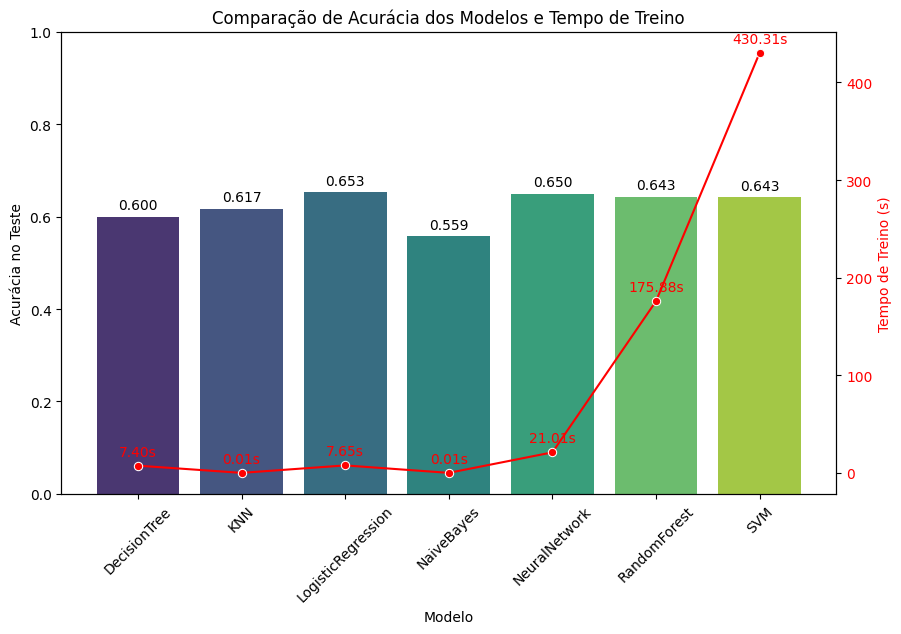

In [ ]:
# Pegue o melhor resultado de cada modelo (incluindo o cenário)
melhores_resultados = df.loc[
    df.groupby('ModeloBase')['Acurácia Teste'].idxmax(),
    ['ModeloBase', 'Cenário', 'Acurácia Teste', 'Tempo Treinamento (s)']
].rename(columns={'ModeloBase': 'Modelo'})

print(melhores_resultados)

# Gráfico (opcional, igual ao anterior)
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(data=melhores_resultados, x='Modelo', y='Acurácia Teste', palette='viridis', ax=ax1, legend=False)
ax1.set_ylabel('Acurácia no Teste')
ax1.set_xlabel('Modelo')
ax1.set_ylim(0, 1)
ax1.set_title('Comparação de Acurácia dos Modelos e Tempo de Treino')
ax1.tick_params(axis='x', rotation=45)

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.3f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                 textcoords='offset points')

ax2 = ax1.twinx()
sns.lineplot(data=melhores_resultados, x='Modelo', y='Tempo Treinamento (s)', marker='o', color='red', ax=ax2)
ax2.set_ylabel('Tempo de Treino (s)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for x, y in zip(melhores_resultados['Modelo'], melhores_resultados['Tempo Treinamento (s)']):
    ax2.annotate(f'{y:.2f}s', (x, y), color='red', fontsize=10, ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()
